In this notebook, we will demonstrate how `TableAutomization.py` can be used for different distributions, in this case the `banana` distribution provided by the cuqipy package.
Please note that a previous read on the `table-donut.ipynb` is suggested, as that notebook provides more detailed explanations on `TableAutomization.py`; moreover, there are comparisons between the two notebooks.

### Importing the needed libraries 

In [1]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
import utilities 
import benchmarksClass as BC 


# The banana distribution


In [3]:
# The banana distribution 
target_banana = BC.Banana()


### Plotting the "banana"

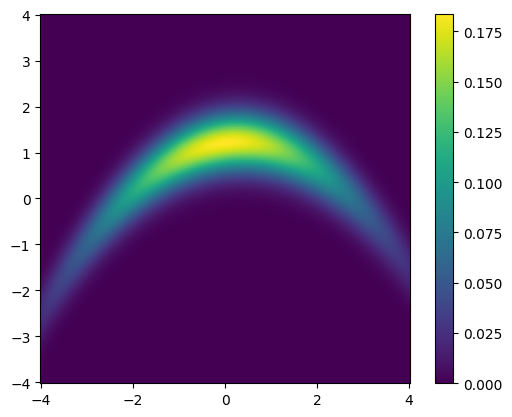

In [4]:
utilities.Plot(target_banana).plot_pdf_2D(-4, 4, -4, 4)


- Compute sampling methods

In [5]:
true_mu = np.array([0, 0])
true_sigma = np.array([1,1])
y = cuqi.distribution.Gaussian(mean=true_mu, cov=true_sigma**2)

In [6]:
samples = utilities.MCMCComparison(target_banana, [1.0, 1.0, 0.065, 0.5, 0.1], 8500, 1500, x0 = y, seed = 12, chains=4)

In [7]:
samples.create_comparison()

Sample 10000 / 10000

Average acceptance rate: 0.37529411764705883 

Sample 10000 / 10000

Average acceptance rate all components: 0.5335882352941177 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000

Average acceptance rate: 0.37529411764705883 

Sample 10000 / 10000

Average acceptance rate all components: 0.5335882352941177 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000

Average acceptance rate: 0.37529411764705883 

Sample 10000 / 10000

Average acceptance rate all components: 0.5335882352941177 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000

Average acceptance rate: 0.37529411764705883 

Sample 10000 / 10000

Average acceptance rate all components: 0.5335882352941177 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000


,MH,CWMH,ULA,MALA,NUTS
samples,8500,8500,8500,8500,8500
burnins,1500,1500,1500,1500,1500
scale,1.0,1.0,0.065,0.5,-
ESS(v0),103.846,30.731,31.378,75.038,166.549
ESS(v1),272.415,45.365,63.144,204.49,130.54
AR,0.375,0.617,1.0,0.507,0.708
LogPDF,10000,19999,10000,10000,40387
Gradient,0,0,10000,10000,40387
Rhat(v0),1.008,1.018,1.008,1.006,1.014
Rhat(v1),1.001,1.013,1.003,1.006,1.01


Observations:
- the  MH_fixed performs quite poorly, as ESS is very low, RHat strays from 1 and the AR is too high
- however, unlike in the donut distribution, the MH_adapted, performs better than expected, with Rhat close to 1.0 (converges well) and ESS, especially ESS(v1), is quite high 
- ULA has acceptence rate AR=1.0, as expected, and it performs well, with ESS parameters not too high but higher than MH, also R_hat is close to 1, meaing that it converges well enough
- MALA performs decently, but NUTS outperforms all the methods, but the computational costs are at least 4 times higher

- Create distribution images  

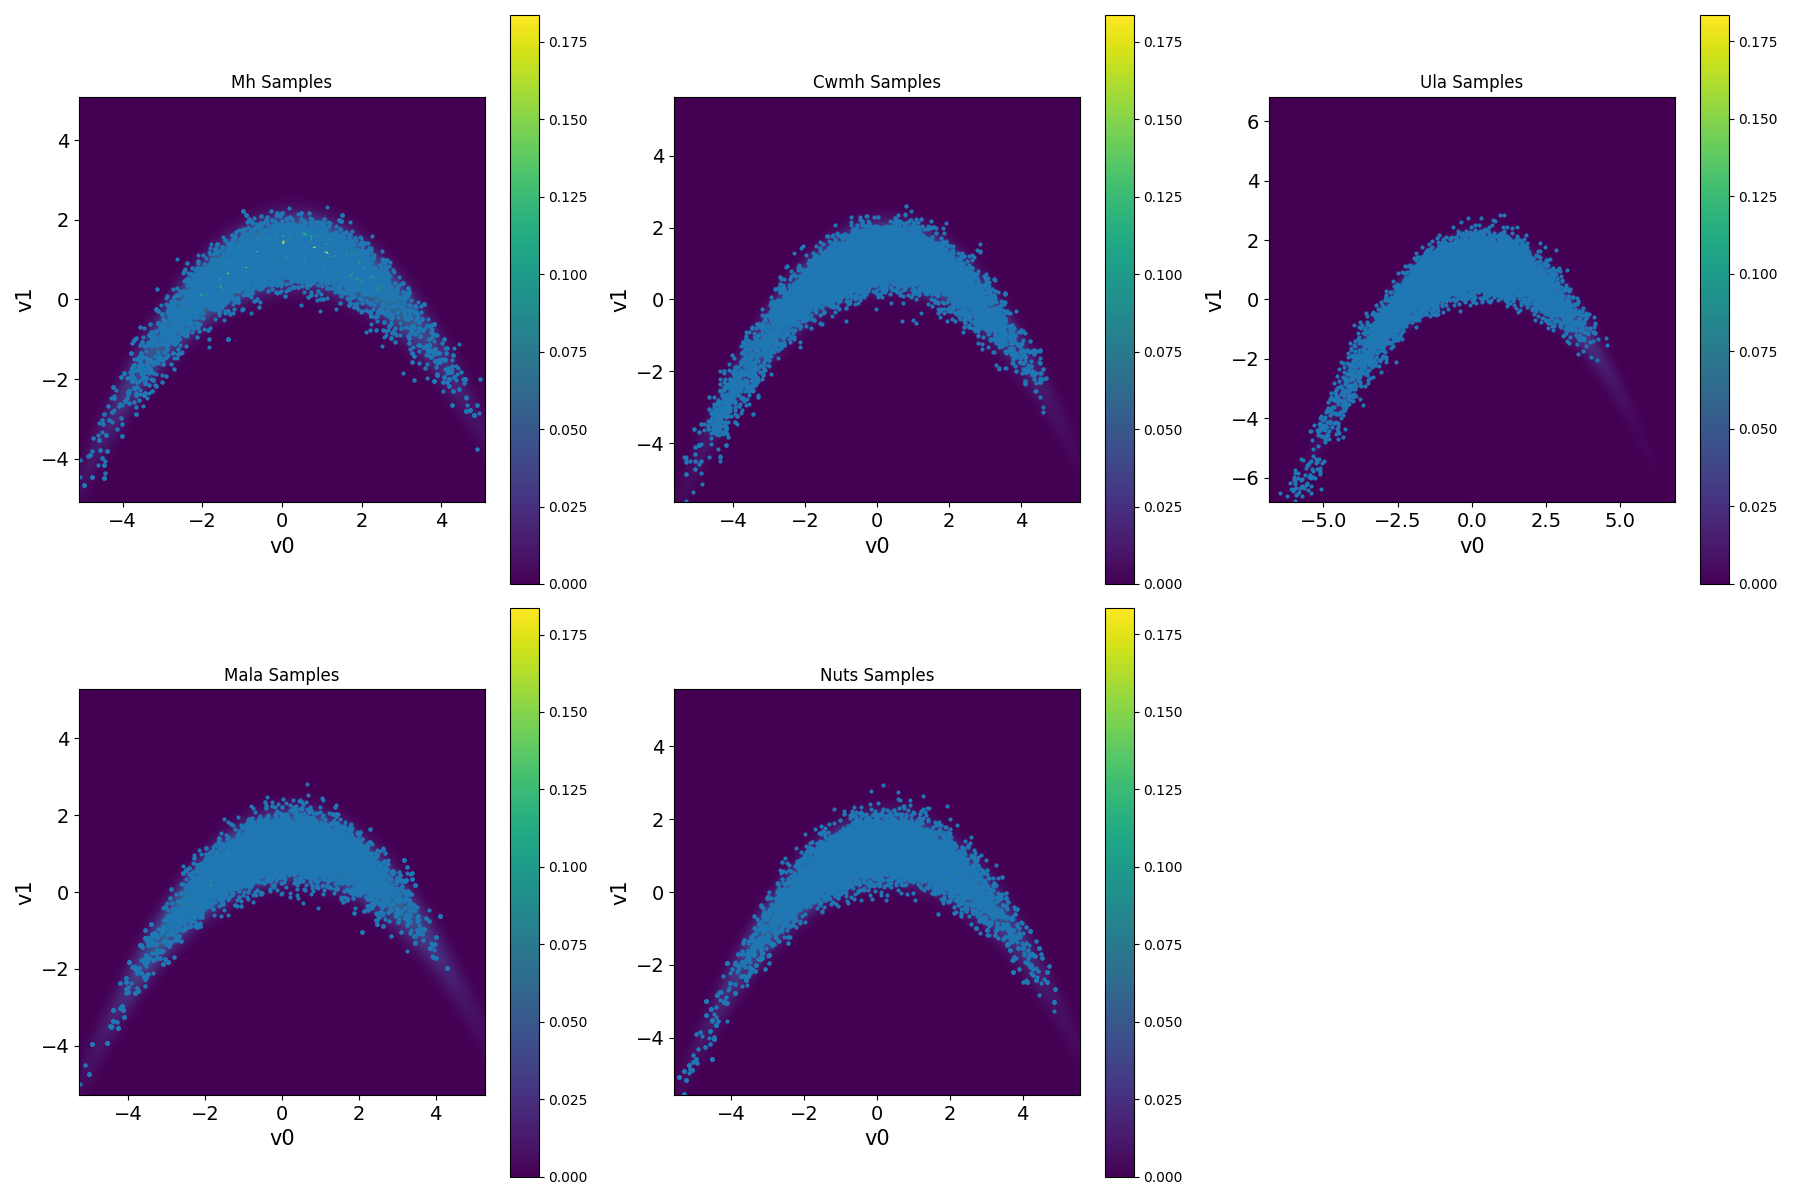

(<Figure size 1800x1200 with 10 Axes>,
 array([<Axes: title={'center': 'Mh Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Cwmh Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Ula Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Mala Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Nuts Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: >], dtype=object))

In [8]:
samples.create_plt()

_Observations_
- as expected the MH_fixed stays quite close to the initial point  
- compared to the previous graphss,it can be seen that setting a relatively high number of burn ins will lead to better results 